In [137]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook


In [138]:
#uploads the data fills blanks with 0 
df=pd.read_csv("real_data_take3d.csv")
df=df.dropna(axis=0, how='all', thresh=None, subset=None, inplace=False)
df=df.fillna(value=0)
#groups = df.groupby('Phase')
#defines categorical dataset for category based modeling 
X = df[['Concentration', 'Time', 'Volume', 'Temperature', 'pH', 'BDFE']]
y_category = df[['Phase']]
y_category=np.ravel(y_category)

#defines regression dataset for regression modeling NEEDS PROPER PHASES 
y_regression = df [['V2O5', 'xerogel', 'V3O7', 'lamellar', 'VO2', 'Z', 'V2O3']]
#X_visual = df[['Concentration', 'Time', 'Volume', 'Temperature', 'pH', 'Phase']]
y_regression_V2O5= df['V2O5']
y_regression_xerogel= df['xerogel']
y_regression_V3O7= df['V3O7']
y_regression_lamellar= df['lamellar']
y_regression_VO2= df['VO2']
y_regression_Z= df['Z']
y_regression_V2O3= df['V2O3']


In [139]:
#changes letter to numerical designations of phase because the model requires a number 
#MUST UPDATE WITH PHASES 

df['Phase2']=df['Phase']
df['Phase2'].replace(to_replace=['A'], value='1', inplace=True)
df['Phase2'].replace(to_replace=['AB'], value='2', inplace=True)
df['Phase2'].replace(to_replace=['ABD'], value='3', inplace=True)
df['Phase2'].replace(to_replace=['AD'], value='4', inplace=True)
df['Phase2'].replace(to_replace=['B'], value='5', inplace=True)
df['Phase2'].replace(to_replace=['C'], value='6', inplace=True)
df['Phase2'].replace(to_replace=['CD'], value='7', inplace=True)
df['Phase2'].replace(to_replace=['CEG'], value='8', inplace=True)
df['Phase2'].replace(to_replace=['CE'], value='9', inplace=True)
df['Phase2'].replace(to_replace=['D'], value='10', inplace=True)
df['Phase2'].replace(to_replace=['E'], value='11', inplace=True)
df['Phase2'].replace(to_replace=['F'], value='12', inplace=True)

y_category_num = df[['Phase2']]
y_category_num=np.ravel(y_category_num)


#Concentration, Time, Volume, Temperature, and pH should all be 0-1. 
from sklearn.preprocessing import MinMaxScaler
X_scale=X[['Concentration', 'Time', 'pH', 'Volume', 'Temperature', 'BDFE']] = MinMaxScaler().fit_transform(X[['Concentration', 'Time', 'pH', 'Volume', 'Temperature', 'BDFE']])


C:\Users\raera\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\raera\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [140]:
#Instead let's try treating the y as multilabel categories 
#this is all data formatting but specifically making it multilabel ready 

#keeps percent compositions 
y_continuous = df[['V2O5', 'xerogel', 'V3O7', 'lamellar', 'VO2', 'Z', 'V2O3']]
#makes the dataset binary in label category for multiphase
y_binary = y_continuous.astype(bool).astype(int)



#adjusted continuous and binary datasets with impurities less than 30% discarded except for columns with only less than 30% presence 
y_continuous_adj=y_continuous
y_continuous_adj['V2O5'].values[df['V2O5'].values<0.3]=0
y_continuous_adj['xerogel'].values[df['xerogel'].values<0.3]=0
y_continuous_adj['lamellar'].values[df['lamellar'].values<0.3]=0
y_continuous_adj['VO2'].values[df['VO2'].values<0.3]=0
y_continuous_adj['Z'].values[df['Z'].values<0.3]=0
y_binary_adj = y_continuous_adj.astype(bool).astype(int)


#first try sklearn classifiers that handle multilabel or multiclass-multioutput 
#then try metaestimators in sklearn 
#then try scikitmultilearn packages which are metaestimators? 

#problem is that no metric currently supported for multioutput multiclass 
#so there's no easy score... 


# Creating dataframe of unsampled space (whole space-sampled space =unsampled space)

In [141]:
#Defining Sampled Space

#Below makes a box behnken dataframe with 5 variables, 3 levels - didn't use the measured pH values because 
#this is what we targeted measuring versus what was measured 
from pyDOE2 import *
bb=pd.DataFrame(bbdesign(5, center=1), columns=('Concentration', 'Time', 'Volume', 'Temperature', 'pH'))
bb2=bb.replace(-1.0, 0.5)

#BDFE was not an initial factor, so it cannot be included in making the box-behnken because this would make the "sampled" 
#space bigger than it was. BDFE can be added as a column after though so that only the BDFE for IPA and HCl are excluded as sampled 
#pH 0=HCl was added BDFE=0, pH 1=IPA was added BDFE= 1, pH 0.5 nothing added BDFE =0
bb2["BDFE"] = bb2["pH"].replace(0.5, 0)

bb2


,Concentration,Time,Volume,Temperature,pH,BDFE
0,0.5,0.5,0.0,0.0,0.0,0.0
1,1.0,0.5,0.0,0.0,0.0,0.0
2,0.5,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0
4,0.5,0.0,0.5,0.0,0.0,0.0
5,1.0,0.0,0.5,0.0,0.0,0.0
6,0.5,0.0,1.0,0.0,0.0,0.0
7,1.0,0.0,1.0,0.0,0.0,0.0
8,0.5,0.0,0.0,0.5,0.0,0.0
9,1.0,0.0,0.0,0.5,0.0,0.0


In [142]:
#Defining Whole Space 

import itertools
from sklearn.preprocessing import MinMaxScaler
Concentration= [0.1, 0.3, 0.5]
Time= [0, 1, 2]
Volume= [8, 12, 16]
Temperature= [200, 225, 250]
#average of initial pH of solution 
pH= [0.54, 1.54, 2.54]
BDFE=[0, 0.666, 0.676, 0.79, 0.825, 0.826, 0.847, 0.964, 0.965, 0.975]
full_factorial=list(map(list, itertools.product(Concentration, Time, Volume, Temperature, pH, BDFE)))
len(full_factorial)
full_factorialpd=pd.DataFrame(full_factorial, columns=('Concentration', 'Time', 'Volume', 'Temperature', 'pH', 'BDFE'))


full_factorialpd[['Concentration','Time', 'pH', 'Volume', 'Temperature', 'BDFE']] = MinMaxScaler().fit_transform(full_factorialpd[['Concentration', 'Time', 'pH', 'Volume', 'Temperature', 'BDFE']])

#full_factorialpd2=full_factorialpd.to_numpy
#full_factorialpd3=pd.DataFrame(data=full_factorialpd2(), columns=('Concentration', 'Time', 'Volume', 'Temperature', 'pH'))
full_factorialpd

,Concentration,Time,Volume,Temperature,pH,BDFE
0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.683077
2,0.0,0.0,0.0,0.0,0.0,0.693333
3,0.0,0.0,0.0,0.0,0.0,0.810256
4,0.0,0.0,0.0,0.0,0.0,0.846154
...,...,...,...,...,...,...
2425,1.0,1.0,1.0,1.0,1.0,0.847179
2426,1.0,1.0,1.0,1.0,1.0,0.868718
2427,1.0,1.0,1.0,1.0,1.0,0.988718
2428,1.0,1.0,1.0,1.0,1.0,0.989744


In [143]:
#IPA is 0.975 which becomes 1
BDFEArray=np.array(BDFE).reshape(-1, 1)
BDFEArray

array([[0.   ],
       [0.666],
       [0.676],
       [0.79 ],
       [0.825],
       [0.826],
       [0.847],
       [0.964],
       [0.965],
       [0.975]])

In [144]:
ScaledBDFE=MinMaxScaler().fit_transform(np.array(BDFE).reshape(-1, 1))
ScaledBDFE

array([[0.        ],
       [0.68307692],
       [0.69333333],
       [0.81025641],
       [0.84615385],
       [0.84717949],
       [0.86871795],
       [0.98871795],
       [0.98974359],
       [1.        ]])

In [145]:
#defining the unsampled space (whole space-sampled space = unsampled space)

qu=pd.merge(full_factorialpd,bb2, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

#qu.to_excel("questions.xlsx")

full_factorialarray=qu.values
full_factorialarray.shape


(2389, 6)

# Fitting the sampled data to a decision tree

In [146]:
X_array=np.asarray(X_scale)
y_binary_adj_array=np.asarray(y_binary_adj)
y_binary_adj.shape


(41, 7)

Accuracy tree_binary_adj: 0.23 (+/- 0.84)


<IPython.core.display.Javascript object>


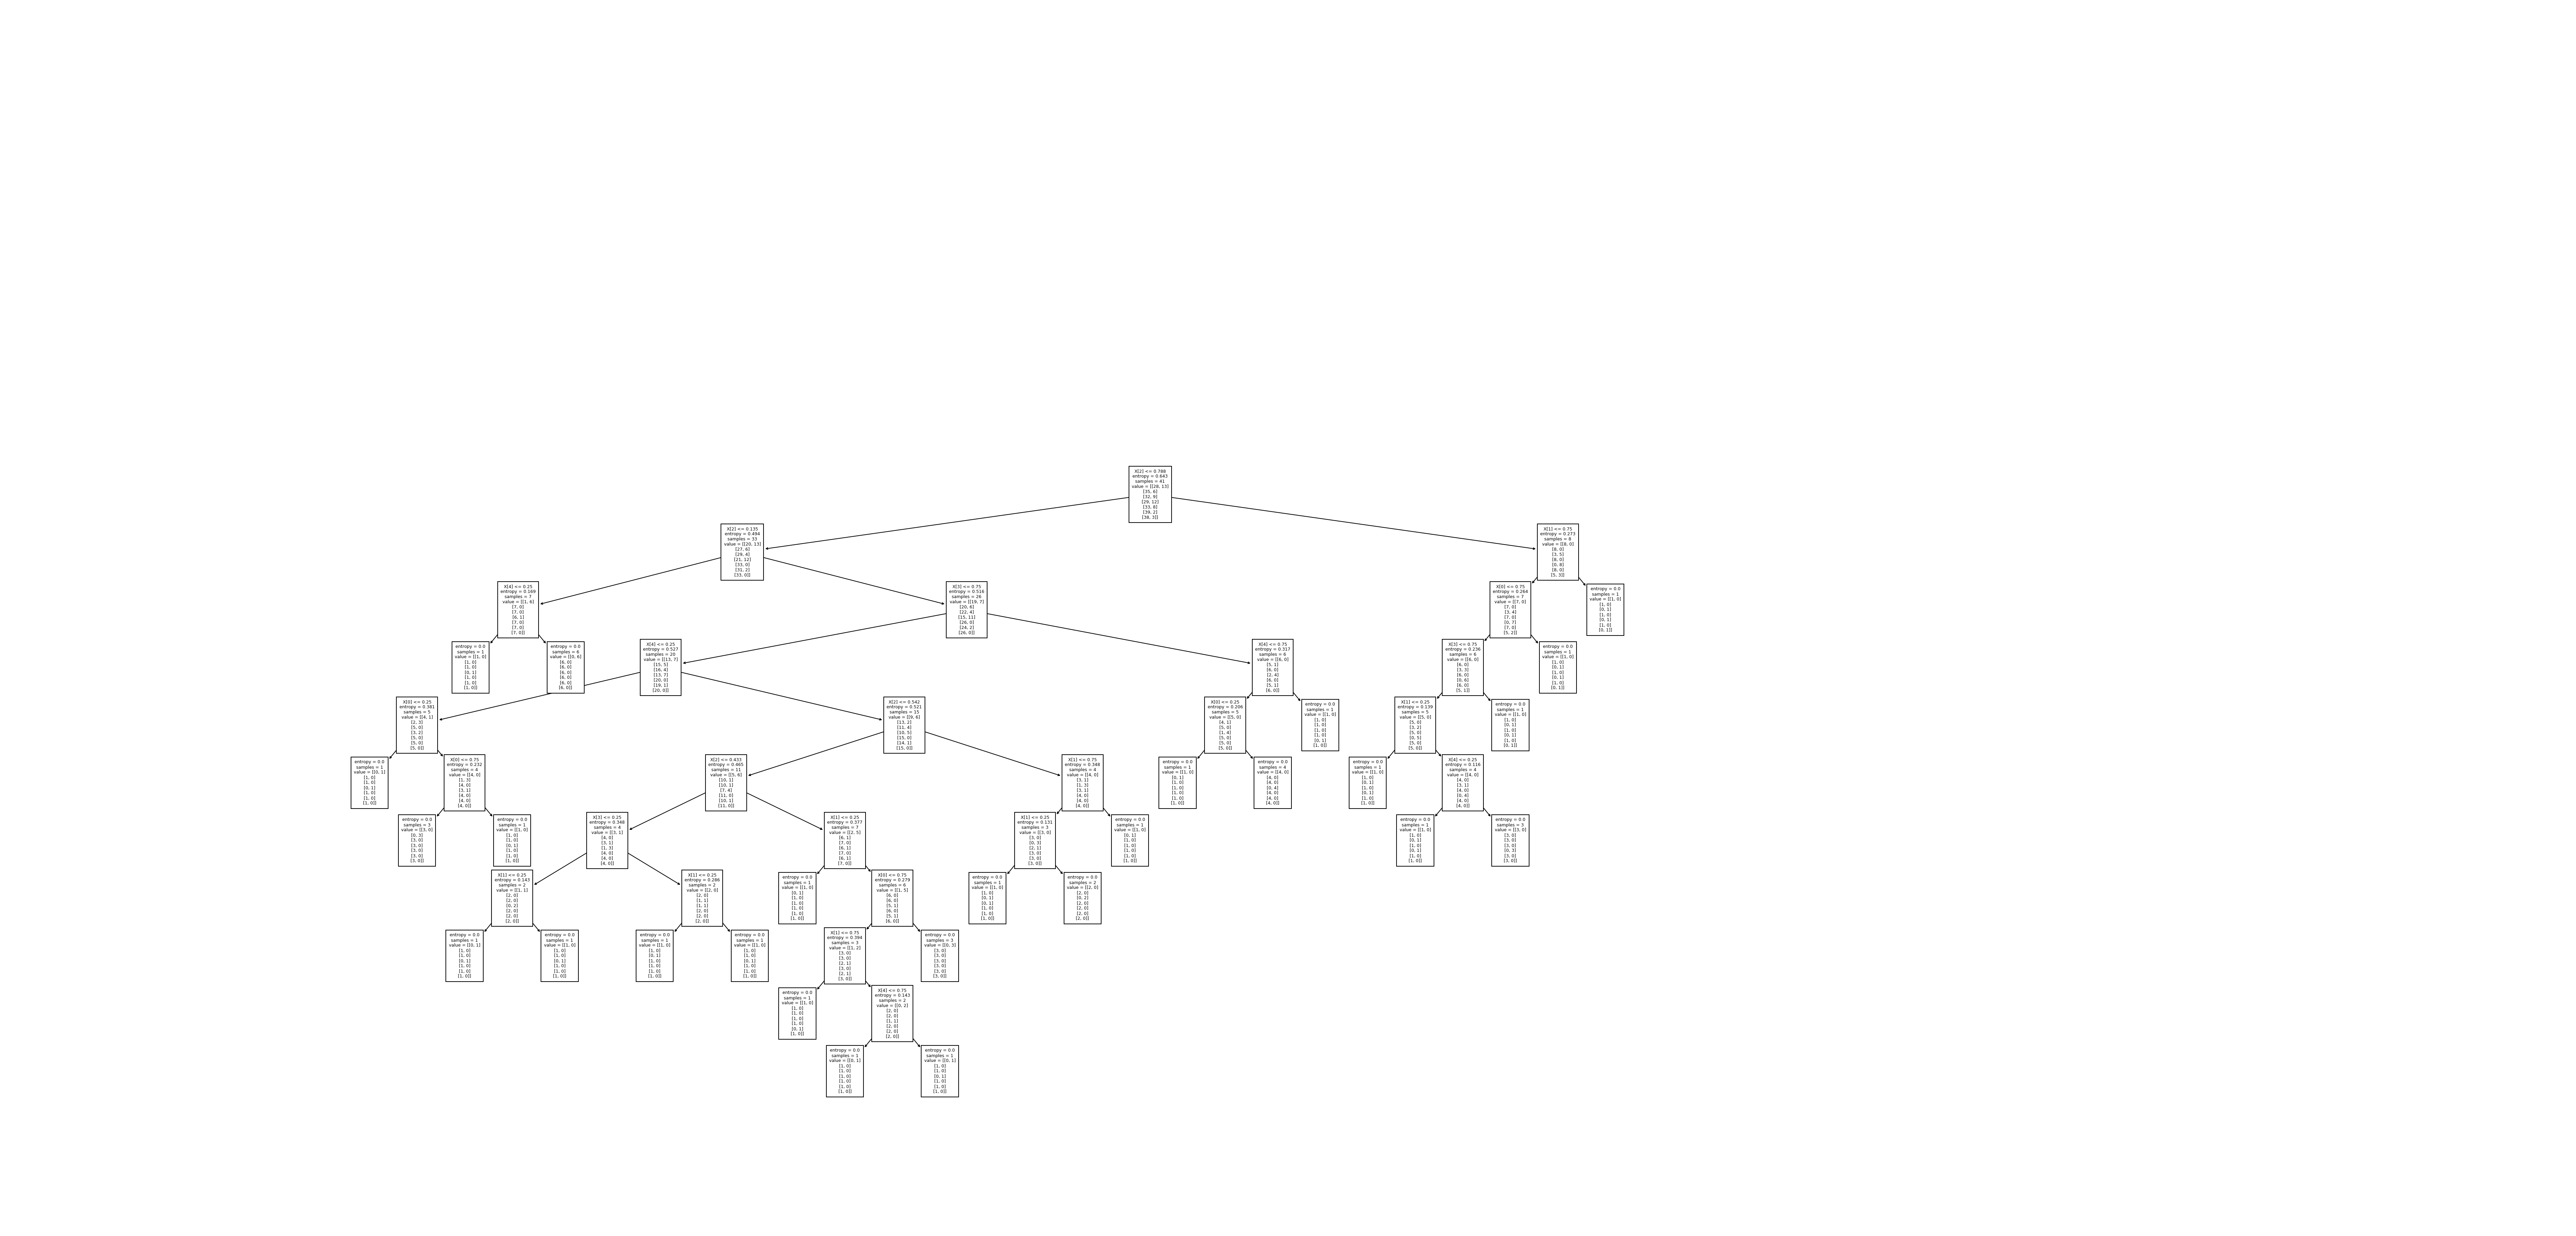

In [147]:
#best model is decision tree- below is fitting the model, drawing the tree, and then trimming the tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

#with adjusted binary
tree_binary_adj = DecisionTreeClassifier(criterion='entropy', random_state=0).fit(X_array, y_binary_adj)
tree_cv_binary_adj = cross_val_score(tree_binary_adj, X_array, y_binary_adj, cv=40)
print("Accuracy tree_binary_adj: %0.2f (+/- %0.2f)" % (tree_cv_binary_adj.mean(), tree_cv_binary_adj.std() * 2)) 

node_indicator = tree_binary_adj.decision_path(X_array)
#print(node_indicator)

fig, ax = plt.subplots(figsize=(50, 24))
tree_binary_adj.score(X_array, y_binary_adj)
tree_binary_adj.predict(X_array)
tree.plot_tree(tree_binary_adj, fontsize=6)

#clf = tree.DecisionTreeClassifier()
#fig, ax = plt.subplots(figsize=(50, 24))
#tree.plot_tree(clf.fit(X, Y), fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)

In [148]:
#part of trimming the tree 
path = tree_binary_adj.cost_complexity_pruning_path(X_array, y_binary_adj)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.00696864, 0.00696864, 0.00845776, 0.00959891,
       0.01209778, 0.0134762 , 0.01689966, 0.02261402, 0.02318823,
       0.02357689, 0.02379415, 0.02432213, 0.02558901, 0.02886209,
       0.04161264, 0.19243461])

<IPython.core.display.Javascript object>


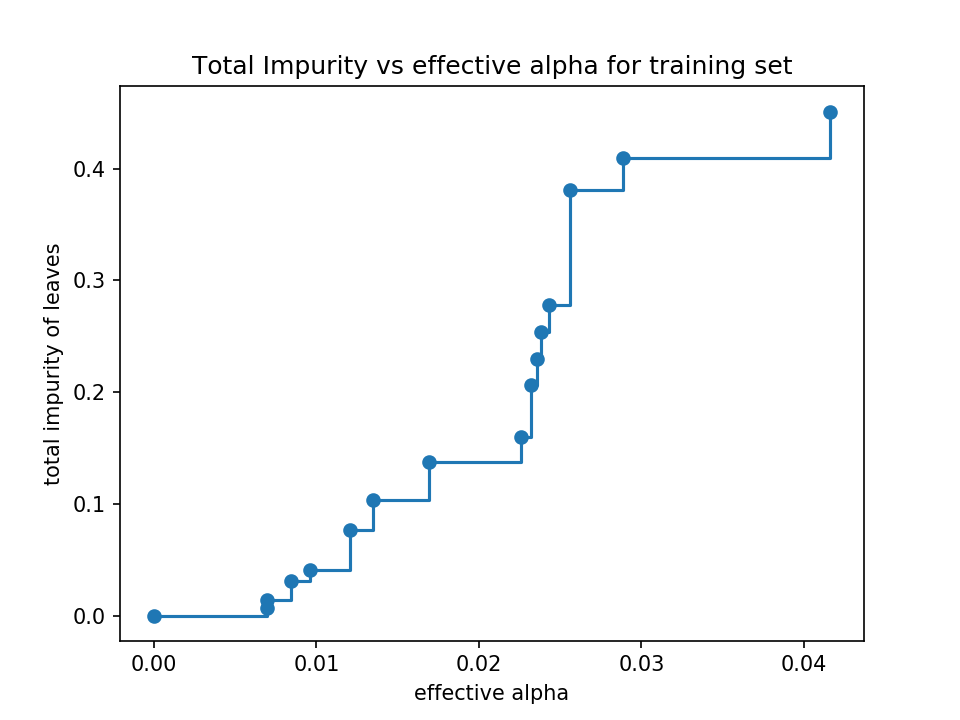

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

In [149]:
#part of trimming the tree 

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [150]:
#part of trimming the tree 

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_array, y_binary_adj)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))
clfs

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1924346119505569


[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.006968641114982578, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.006968641114982578, class_weight=None,
                        criterion='gini', max_

<IPython.core.display.Javascript object>


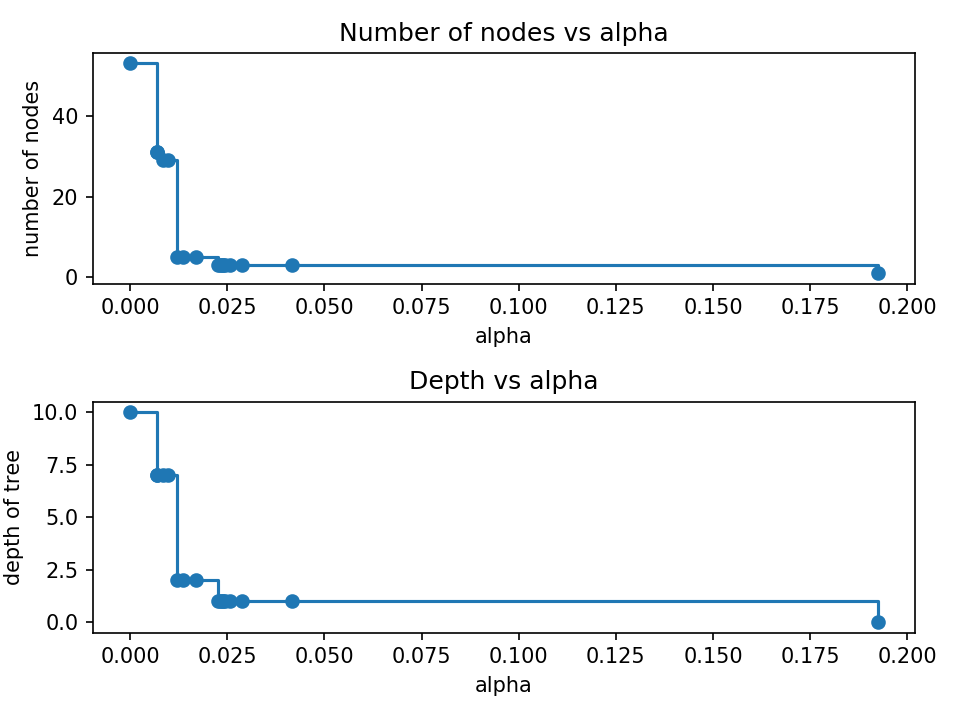

In [151]:
#part of trimming the tree 

#clfs = clfs[:-1]
#ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [152]:
#part of trimming the tree 

print (ccp_alphas)

[0.         0.00696864 0.00696864 0.00845776 0.00959891 0.01209778
 0.0134762  0.01689966 0.02261402 0.02318823 0.02357689 0.02379415
 0.02432213 0.02558901 0.02886209 0.04161264 0.19243461]


In [153]:
#error here is an accuracy ... oops, the naming is just confusing
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo_errors_binary_adj=[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
#X_array=np.asarray(X)
y_binary_adj_array=np.asarray(y_binary_adj)

for train_index, test_index in loo.split(X_array, y_binary_adj_array):
    X_train_ba, X_test_ba = X_array[train_index], X_array[test_index]
    y_train_ba, y_test_ba = y_binary_adj_array[train_index], y_binary_adj_array[test_index]
    
    tree_loo_binary_adj0=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[0].append(tree_loo_binary_adj0)
    
    tree_loo_binary_adj1=DecisionTreeClassifier(ccp_alpha=0.006968641114982578, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[1].append(tree_loo_binary_adj1)
    
    tree_loo_binary_adj2=DecisionTreeClassifier(ccp_alpha=0.008457757791416973, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[2].append(tree_loo_binary_adj2)
    
    tree_loo_binary_adj3=DecisionTreeClassifier(ccp_alpha=0.009598911157364004, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[3].append(tree_loo_binary_adj3)
    
    tree_loo_binary_adj4=DecisionTreeClassifier(ccp_alpha=0.01209778289724285, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[4].append(tree_loo_binary_adj4)
    
    tree_loo_binary_adj5=DecisionTreeClassifier(ccp_alpha=0.013476197723884312, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[5].append(tree_loo_binary_adj5)

    
    tree_loo_binary_adj6=DecisionTreeClassifier(ccp_alpha=0.01689965782172539, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[6].append(tree_loo_binary_adj5)
    
    tree_loo_binary_adj7=DecisionTreeClassifier(ccp_alpha=0.022614024375167466, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[7].append(tree_loo_binary_adj6)
    
    tree_loo_binary_adj8=DecisionTreeClassifier(ccp_alpha=0.02318823007684179, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[8].append(tree_loo_binary_adj7)
    
    tree_loo_binary_adj9=DecisionTreeClassifier(ccp_alpha=0.023576894566288926, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[9].append(tree_loo_binary_adj8)
    
    tree_loo_binary_adj10=DecisionTreeClassifier(ccp_alpha=0.023794151300733226, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[10].append(tree_loo_binary_adj9)
    
    tree_loo_binary_adj11=DecisionTreeClassifier(ccp_alpha=0.024322125405387196, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[11].append(tree_loo_binary_adj10)
    
    tree_loo_binary_adj12=DecisionTreeClassifier(ccp_alpha=0.02558900616695555, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[12].append(tree_loo_binary_adj11)
    
    tree_loo_binary_adj13=DecisionTreeClassifier(ccp_alpha=0.028862086760113537, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[13].append(tree_loo_binary_adj12)
    
    tree_loo_binary_adj14=DecisionTreeClassifier(ccp_alpha=0.0416126402439006, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[14].append(tree_loo_binary_adj13)
    
    tree_loo_binary_adj15=DecisionTreeClassifier(ccp_alpha=0.1924346119505569, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[15].append(tree_loo_binary_adj14)
    
loo_errors_binary_adj_mean=np.mean(loo_errors_binary_adj, axis=1)
loo_errors_binary_adj_std=np.std(loo_errors_binary_adj, axis=1)
#print(loo_errors_mean[0])
#print(loo_errors_mean[1])
#print(loo_errors_mean[2])
#print("LeaveOneOut Error Knn: %0.2f (+/- %0.2f)" % (loo_error.mean(), MLP_cv_binary_adj.std() * 2))
print("LeaveOneOutError", loo_errors_binary_adj_mean)
print("LeaveOneOutStd", loo_errors_binary_adj_std)

#Use the forth one.. maybe 
#the score for this is a loo where In multi-label classification, this is the subset 
#accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

LeaveOneOutError [0.26829268 0.34146341 0.34146341 0.36585366 0.19512195 0.19512195
 0.19512195 0.04878049 0.04878049 0.04878049 0.04878049 0.04878049
 0.04878049 0.04878049 0.04878049 0.04878049]
LeaveOneOutStd [0.44307078 0.47420054 0.47420054 0.48166872 0.39629456 0.39629456
 0.39629456 0.2154088  0.2154088  0.2154088  0.2154088  0.2154088
 0.2154088  0.2154088  0.2154088  0.2154088 ]


# Checking model attributes

In [158]:
#decision tree model from above 
tree_binary_adj1_test=DecisionTreeClassifier(ccp_alpha=0.009598911157364004, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best')
tree_binary_adj1_test.fit(X_array, y_binary_adj)

#so the probability that the sample is the phase is the second column predict_proba

tree_binary_adj1_test.classes_

[array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1])]

# Using the trimmed decision tree to predict outputs for the full_factorialarray 

In [159]:
#code refits the trimmed decision tree model and then uses the fit model to predict the phase and probability of that phase 
tree_binary_adj1_test=DecisionTreeClassifier(ccp_alpha=0.009598911157364004, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best')
tree_binary_adj1_test.fit(X_array, y_binary_adj)

# outputting chosen decision tree model predict proba, which comes out in multilabel predict probab form 
#this is a problem for active learning codes 
#The predict proba gives us some challenges because for multilabel data it can produce an array for each output category
#This is just dealth with by using Alipy manual input of the predict proba
#predict proba is the fraction of samples of the same class in a leaf. 

Results=tree_binary_adj1_test.predict_proba(full_factorialarray)
#outputs as a (2389, 7) binary array 
Results2=tree_binary_adj1_test.predict(full_factorialarray)
#has issues with zero probability - can't remember if this was a problem in past 
Results3=tree_binary_adj1_test.predict_log_proba(full_factorialarray)

#print(multi_target_forest.predict_proba(X))

#Resultsdf = pd.DataFrame.from_records(data_transposed, columns=["A1", "A2", "B1", "B2", "C1", "C2", "D1", "D2", "E1", "E2", "F1", "F2"])
#Resultsdf
tree_binary_adj1_test.n_classes_
#list containing the number of classes for each output. (2 classes each for 7 phases)
#first column class 0 (not the phase), second column is class 1 (is the phase)
tree_binary_adj1_test.classes_


C:\Users\raera\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:952: RuntimeWarning: divide by zero encountered in log
  proba[k] = np.log(proba[k])


[array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1])]

In [160]:
# for seven phases there are 7 outputs with two classes each (0,1)
#predict proba gives the probability for each CLASS (which is eiher the class = is not the phase or class= is the phase) 
 
Results

[array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 array([[1.   , 0.   ],
        [1.   , 0.   ],
        [1.   , 0.   ],
        ...,
        [0.375, 0.625],
        [0.375, 0.625],
        [0.375, 0.625]]),
 array([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 array([[1.   , 0.   ],
        [1.   , 0.   ],
        [1.   , 0.   ],
        ...,
        [0.625, 0.375],
        [0.625, 0.375],
        [0.625, 0.375]])]

# Additional Error metrics for the model ( a side note)

In [162]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
tree_loo_pred_binary_adj=[[]]
#X_array=np.asarray(X)
y_binary_adj_array=np.asarray(y_binary_adj)

for train_index, test_index in loo.split(X_array, y_binary_adj_array):
    X_train_ba, X_test_ba = X_array[train_index], X_array[test_index]
    y_train_ba, y_test_ba = y_binary_adj_array[train_index], y_binary_adj_array[test_index]
    
    tree_loo_binary_adj1_pred=DecisionTreeClassifier(ccp_alpha=0.009598911157364004, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='best').fit(X_train_ba, y_train_ba).predict(X_test_ba)
    tree_loo_pred_binary_adj[0].append(tree_loo_binary_adj1_pred)
    
a = np.array(tree_loo_pred_binary_adj)
a.shape = -1, 7
print(a.shape)
tree_loo_pred_binary_adj_df=pd.DataFrame(a, columns=['V2O5', 'xerogel', 'V3O7', 'lamellar', 'VO2', 'Z', 'V2O3'])

tree_loo_pred_binary_adj_df.to_excel("tree_loo_pred_binary_adj_allphase.xlsx")

tree_loo_RMSE = mean_squared_error(y_binary_adj_array, tree_loo_pred_binary_adj_df, squared=False)
tree_loo_RMSE
#SVR_loo_V2O5_RMSE = mean_squared_error(y_regression_V2O5, loo_pred_V205, squared=False)
#print("SVR LeaveOneOut V2O5 RMSE", SVR_loo_V2O5_RMSE)

(41, 7)


0.38707335735248616

In [163]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
tree_loo_predproba_binary_adj=[[]]
#X_array=np.asarray(X)
y_binary_adj_array=np.asarray(y_binary_adj)

for train_index, test_index in loo.split(X_array, y_binary_adj_array):
    X_train_ba, X_test_ba = X_array[train_index], X_array[test_index]
    y_train_ba, y_test_ba = y_binary_adj_array[train_index], y_binary_adj_array[test_index]
    
    tree_loo_binary_adj1_pred=DecisionTreeClassifier(ccp_alpha=0.009598911157364004, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='best').fit(X_train_ba, y_train_ba).predict_proba(X_test_ba)
    tree_loo_predproba_binary_adj[0].append(tree_loo_binary_adj1_pred)
    
a = np.array(tree_loo_predproba_binary_adj)
#a.shape = -1, 7
a.shape 
#A shape is 1, 41, 6, 1, 2 and we want all the rows 41 and then the second column of the last one
reshape=a[:,:,:,:, 1]
reshape.shape
reshape
reshape.shape = -1, 7
reshape
#make a dataframe of shape and save it 

tree_loo_predproba_binary_adj_df=pd.DataFrame(reshape, columns=['V2O5', 'xerogel', 'V3O7', 'lamellar', 'VO2', 'Z', 'V2O3'])
tree_loo_predproba_binary_adj_df
tree_loo_predproba_binary_adj_df.to_excel("tree_loo_predproba_binary_adj_allphase.xlsx")
#tree_loo_predproba_binary_adj

#tree_loo_RMSE = mean_squared_error(y_binary_adj_array, tree_loo_pred_binary_adj_df, squared=False)
#tree_loo_RMSE
#SVR_loo_V2O5_RMSE = mean_squared_error(y_regression_V2O5, loo_pred_V205, squared=False)
#print("SVR LeaveOneOut V2O5 RMSE", SVR_loo_V2O5_RMSE)

# Back to : Using the trimmed decision tree to predict outputs for the full_factorialarray

In [165]:
#since input datatable lists presence of absence of phases (7 outputs (phases found)) as 0 - not present, 1, present 
#model fits the binary designation we put in place as 2 classes in each output
#second column of predict_proba from the decision tree is the equivalent to the 
#certainty that the reaction would prodjuce a given phase 
#we have as inputs to predict 2389 samples with 6 features

#Sklearn defines predict_proba as: "The predicted class probability is the fraction of samples of the same class in a leaf.""

#probability_class_1 = model.predict_proba(X)[:, 1]
#Results=tree_loo_binary_adj_test.predict_proba(full_factorialarray)[:, 1]
#mean_data = np.array(mean_data)
mean_data = np.array(Results)
sliced=mean_data[:, :, 1].transpose()
uncertainty_table = pd.DataFrame(sliced)
uncertainty_table.to_excel("tree_loo_predproba_binary_adj2ndcolumnBDFE.xlsx")

uncertainty_table

,0,1,2,3,4,5,6
0,0.0,0.0,0.000,1.0,0.0,0.0,0.000
1,0.0,0.0,0.000,1.0,0.0,0.0,0.000
2,0.0,0.0,0.000,1.0,0.0,0.0,0.000
3,0.0,0.0,0.000,1.0,0.0,0.0,0.000
4,0.0,0.0,0.000,1.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...
2384,0.0,0.0,0.625,0.0,1.0,0.0,0.375
2385,0.0,0.0,0.625,0.0,1.0,0.0,0.375
2386,0.0,0.0,0.625,0.0,1.0,0.0,0.375
2387,0.0,0.0,0.625,0.0,1.0,0.0,0.375


In [175]:
#ALIPY active learning predictions for decision tree using uncertainty sampling 
#first chosen is on bottom not top 

#This gives uncertainty sampling method, however, layout doesn't work with all alipy aquisition functions
from alipy.query_strategy import (QueryInstanceQBC, QueryInstanceGraphDensity,
                                  QueryInstanceUncertainty, QueryRandom)
#QBCStrategy = QueryInstanceQBC(X, y)
#uncertainStrategy = QueryInstanceUncertainty(X, y)
#unlabel_index=full_factorialarray
#label_index=
#QueryInstanceUncertainty(X=None, y=None, measure='entropy').select(self, label_index, unlabel_index, model=tree_binary_adj1_test, batch_size=1)
#init(self, X=None, y=None, measure='entropy')

#X_train_ba, y_train_ba

select_ind = QueryInstanceUncertainty(X=None, y=None, measure='entropy').select_by_prediction_mat(unlabel_index=full_factorialarray, predict=uncertainty_table, batch_size=5)
select_ind

array([[1.        , 1.        , 0.5       , 0.5       , 1.        ,
        0.98871795],
       [1.        , 1.        , 0.5       , 0.5       , 1.        ,
        0.98974359],
       [1.        , 1.        , 0.5       , 0.5       , 1.        ,
        1.        ],
       [1.        , 1.        , 0.5       , 0.5       , 1.        ,
        0.        ],
       [0.5       , 0.5       , 0.5       , 0.5       , 1.        ,
        0.86871795]])

In [181]:
entropy_list=QueryInstanceUncertainty(X=None, y=None, measure='entropy').calc_entropy(predict_proba=uncertainty_table)
#because predict_proba is based on populations at the ends of nodes, there are only a select number of values for entropy produced. 
#if table is just ranked by entropy then sampled in order then very similar samples will be studied
#entropy_list

In [207]:
#looking at the data in more detail 

#creating excel sheet with the entropy versus sample descriptions
full_factorialarray_entropy=pd.DataFrame(full_factorialarray, columns=('Concentration', 'Time', 'Volume', 'Temperature', 'pH', 'BDFE'))
full_factorialarray_entropy['Entropy']=entropy_list
full_factorialarray_entropy.to_excel("full_factorialarray_entropy.xlsx")

#creating excel sheet with the entropy versus predict_proba values 
uncertainty_table_entropy=pd.DataFrame(uncertainty_table)
uncertainty_table_entropy['Entropy']=entropy_list
column_names=['V2O5', 'xerogel', 'V3O7', 'lamellar', 'VO2', 'Z', 'V2O3', 'Entropy']
uncertainty_table_entropy.columns = column_names
uncertainty_table_entropy.to_excel("uncertainty_table_entropy.xlsx")

uncertainty_table_entropy

,V2O5,xerogel,V3O7,lamellar,VO2,Z,V2O3,Entropy
0,0.000001,0.000001,0.000001,1.000000,0.000001,0.000001,0.000001,0.000083
1,0.000001,0.000001,0.000001,1.000000,0.000001,0.000001,0.000001,0.000083
2,0.000001,0.000001,0.000001,1.000000,0.000001,0.000001,0.000001,0.000083
3,0.000001,0.000001,0.000001,1.000000,0.000001,0.000001,0.000001,0.000083
4,0.000001,0.000001,0.000001,1.000000,0.000001,0.000001,0.000001,0.000083
...,...,...,...,...,...,...,...,...
2384,0.000001,0.000001,0.625000,0.000001,1.000000,0.000001,0.375000,0.661619
2385,0.000001,0.000001,0.625000,0.000001,1.000000,0.000001,0.375000,0.661619
2386,0.000001,0.000001,0.625000,0.000001,1.000000,0.000001,0.375000,0.661619
2387,0.000001,0.000001,0.625000,0.000001,1.000000,0.000001,0.375000,0.661619


# Code below here is very much still in progress

In [168]:
#now try with MLP model 
from sklearn.neural_network import MLPClassifier
MLP_binary_adj_test = MLPClassifier(max_iter=300, solver='lbfgs')
MLP_binary_adj_test.fit(X_array, y_binary_adj)

Results_MLP=MLP_binary_adj_test.predict_proba(full_factorialarray)
Results2_MLP=MLP_binary_adj_test.predict(full_factorialarray)
Results3_MLP=MLP_binary_adj_test.predict_log_proba(full_factorialarray)
Results_MLP.shape

(2389, 7)

In [170]:
#MLP shape is correct, no need to pull certain column
#mean_data_MLP = np.array(Results_MLP)
#sliced_MLP=mean_data_MLP[:, :, 1].transpose()
#uncertainty_table_MLP = pd.DataFrame(sliced_MLP)
#uncertainty_table_MLP

In [172]:
#first chosen is on bottom not top 

#This gives uncertainty sampling method, however, layout doesn't work with all alipy aquisition functions

select_ind_MLP = QueryInstanceUncertainty(X=None, y=None, measure='entropy').select_by_prediction_mat(unlabel_index=full_factorialarray, predict=Results_MLP, batch_size=5)
select_ind_MLP

array([[0.        , 1.        , 0.5       , 1.        , 0.5       ,
        0.86871795],
       [0.5       , 1.        , 1.        , 1.        , 0.        ,
        0.98974359],
       [0.5       , 1.        , 1.        , 1.        , 0.        ,
        0.98871795],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.69333333],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.68307692]])

In [173]:
#now for SVC
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
SVC_OVR_binary_adj_test = OneVsRestClassifier(SVC(probability=True))
SVC_OVR_binary_adj_test.fit(X_array, y_binary_adj)

Results_SVC=SVC_OVR_binary_adj_test.predict_proba(full_factorialarray)
Results2_SVC=SVC_OVR_binary_adj_test.predict(full_factorialarray)
#Results3_SVC=SVC_OVR_binary_adj_test.predict_log_proba(full_factorialarray)
Results_SVC.shape

(2389, 7)

In [174]:
#first chosen is on bottom not top 

#This gives uncertainty sampling method, however, layout doesn't work with all alipy aquisition functions

select_ind_SVC = QueryInstanceUncertainty(X=None, y=None, measure='entropy').select_by_prediction_mat(unlabel_index=full_factorialarray, predict=Results_SVC, batch_size=5)
select_ind_SVC

array([[1.        , 1.        , 0.5       , 0.5       , 0.5       ,
        0.68307692],
       [0.5       , 0.5       , 0.5       , 1.        , 1.        ,
        0.68307692],
       [0.5       , 0.5       , 0.5       , 1.        , 1.        ,
        0.69333333],
       [0.5       , 1.        , 0.5       , 0.5       , 0.5       ,
        0.69333333],
       [0.5       , 1.        , 0.5       , 0.5       , 0.5       ,
        0.68307692]])